/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - loss: 0.0730 - mae: 0.1322 - val_loss: 0.0052 - val_mae: 0.0407
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 40s 74ms/step - loss: 0.0134 - mae: 0.0683 - val_loss: 0.0071 - val_mae: 0.0489
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 23s 68ms/step - loss: 0.0113 - mae: 0.0631 - val_loss: 0.0062 - val_mae: 0.0465
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step - loss: 0.0102 - mae: 0.0607 - val_loss: 0.0065 - val_mae: 0.0436
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 43s 79ms/step - loss: 0.0085 - mae: 0.0550 - val_loss: 0.0048 - val_mae: 0.0417
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - loss: 0.0095 - mae: 0.0563 - val_loss: 0.0047 - val_mae: 0.0399
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 0.0086 - mae: 0.0549 - val_loss: 0.0050 - val_mae: 0.0456
Epoch 8/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - loss: 0.0074 - mae: 0.0506 - val_loss: 0.0040 - val_mae: 0.0412
Epoch 9/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1116 - mae: 0.1564 - val_loss: 0.0210 - val_mae: 0.1152
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0135 - mae: 0.0704 - val_loss: 0.0074 - val_mae: 0.0664
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0113 - mae: 0.0637 - val_loss: 0.0071 - val_mae: 0.0667
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0085 - mae: 0.0553 - val_loss: 0.0082 - val_mae: 0.0714
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0086 - mae: 0.0542 - val_loss: 0.0085 - val_mae: 0.0742
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0081 - mae: 0.0531 - val_loss: 0.0058 - val_mae: 0.0600
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0093 - mae: 0.0534 - val_loss: 0.0050 - val_mae: 0.0562
Epoch 8/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0065 - mae: 0.0477 - val_loss: 0.0041 - val_mae: 0.0536
Epoch 9/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss

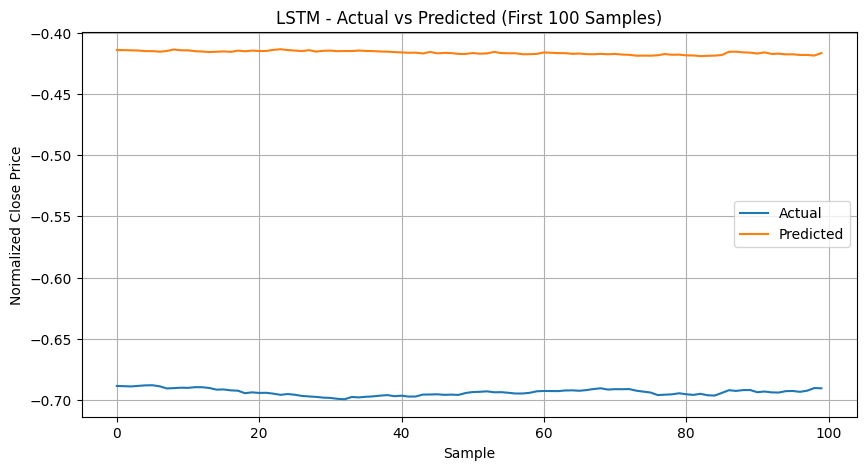

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

📊 CNN Evaluation:
MAE: 0.0660
MSE: 0.0055
RMSE: 0.0740
R² Score: 0.9476
Directional Accuracy: 48.91%


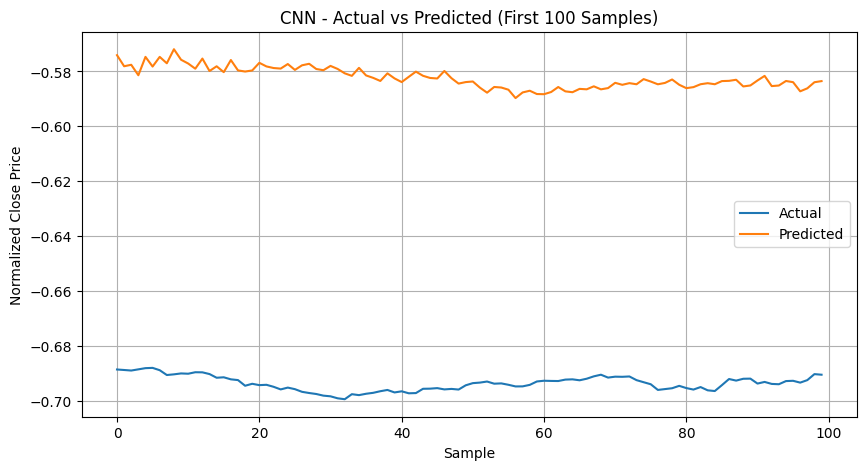

In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout
import matplotlib.pyplot as plt

# --- 2. Load and Prepare Data ---
df = pd.read_csv("/content/drive/MyDrive/Time series/top_10_stock_data.csv")  # Replace with your actual CSV path

# Parse date and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])

# Encode 'Scrip'
le = LabelEncoder()
df['Ticker_encoded'] = le.fit_transform(df['Ticker'])

# Features and normalization
features = ['Open', 'High', 'Low', 'Close', 'Volume']
df[features] = df[features].fillna(df[features].median())
scaler = RobustScaler()
df[features] = scaler.fit_transform(df[features])

# --- 3. Create Sequences ---
def create_sequences(data, seq_len=30):
    X, y = [], []
    for Ticker in data['Ticker_encoded'].unique():
        Ticker_data = data[data['Ticker_encoded'] == Ticker][features].values
        for i in range(len(Ticker_data) - seq_len):
            X.append(Ticker_data[i:i+seq_len])

            y.append(Ticker_data[i+seq_len][3])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(df, seq_len)

# Train-test split (85% training)
split = int(len(X) * 0.85)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# --- 4. LSTM Model ---
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

lstm_model = build_lstm_model(X_train.shape[1:])
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=64,
                              validation_data=(X_test, y_test), verbose=1)

# --- 5. CNN Model ---
def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

cnn_model = build_cnn_model(X_train.shape[1:])
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=64,
                            validation_data=(X_test, y_test), verbose=1)


def directional_accuracy(actual, predicted):

    actual_direction = np.sign(np.diff(actual))
    predicted_direction = np.sign(np.diff(predicted))
    return np.mean(actual_direction == predicted_direction) * 100

def evaluate_model(model, X_test, y_test, model_name):
    # Predict
    y_pred = model.predict(X_test).flatten()

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    dacc = directional_accuracy(y_test, y_pred)


    print(f"\n📊 {model_name} Evaluation:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Directional Accuracy: {dacc:.2f}%")


    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:100], label='Actual')
    plt.plot(y_pred[:100], label='Predicted')
    plt.title(f'{model_name} - Actual vs Predicted (First 100 Samples)')
    plt.xlabel('Sample')
    plt.ylabel('Normalized Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- 8. Evaluate Models ---
evaluate_model(lstm_model, X_test, y_test, "LSTM")
evaluate_model(cnn_model, X_test, y_test, "CNN")


117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


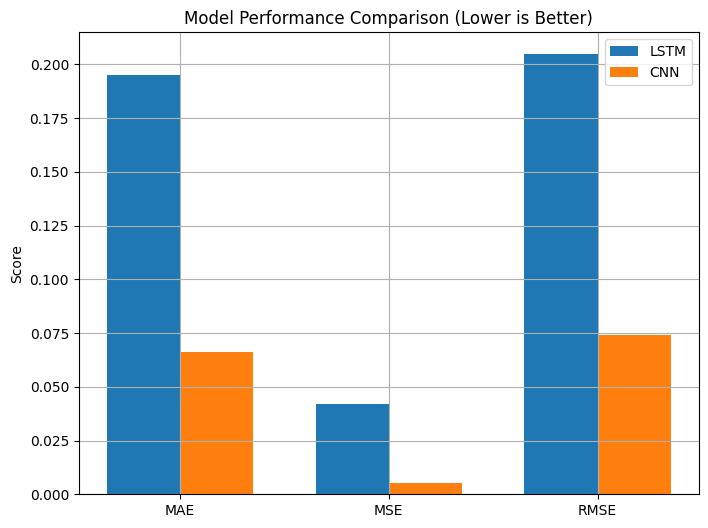

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


y_pred_lstm = lstm_model.predict(X_test).flatten()
y_pred_cnn = cnn_model.predict(X_test).flatten()

# Compute metrics
def compute_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

mae_lstm, mse_lstm, rmse_lstm = compute_metrics(y_test, y_pred_lstm)
mae_cnn, mse_cnn, rmse_cnn = compute_metrics(y_test, y_pred_cnn)


metrics = ['MAE', 'MSE', 'RMSE']
lstm_scores = [mae_lstm, mse_lstm, rmse_lstm]
cnn_scores = [mae_cnn, mse_cnn, rmse_cnn]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, lstm_scores, width, label='LSTM')
plt.bar(x + width/2, cnn_scores, width, label='CNN')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Lower is Better)')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True)
plt.show()


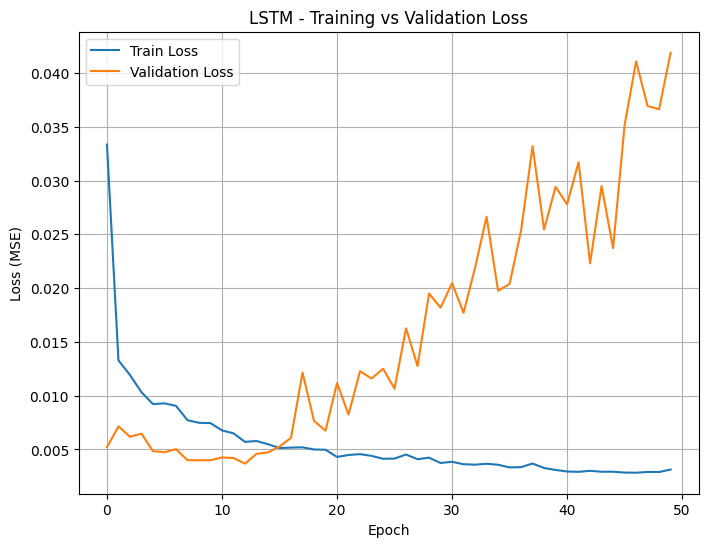

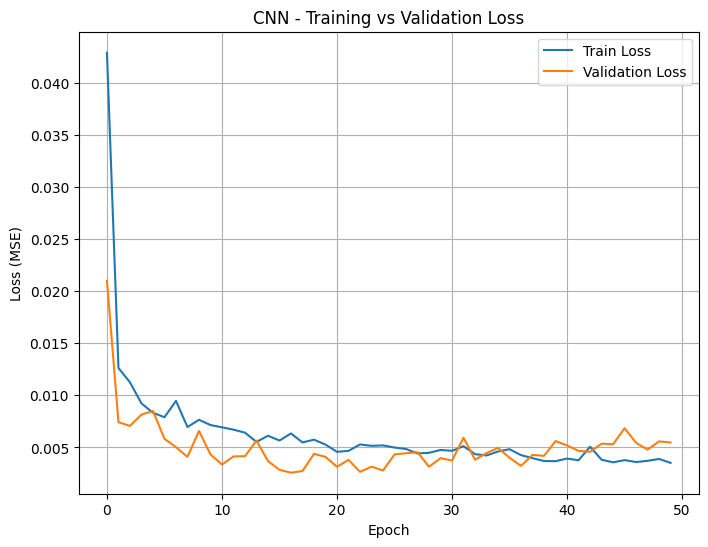

In [ ]:
# --- 2. Training/Validation Loss Curve ---
def plot_training_history(history, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(lstm_history, 'LSTM')
plot_training_history(cnn_history, 'CNN')

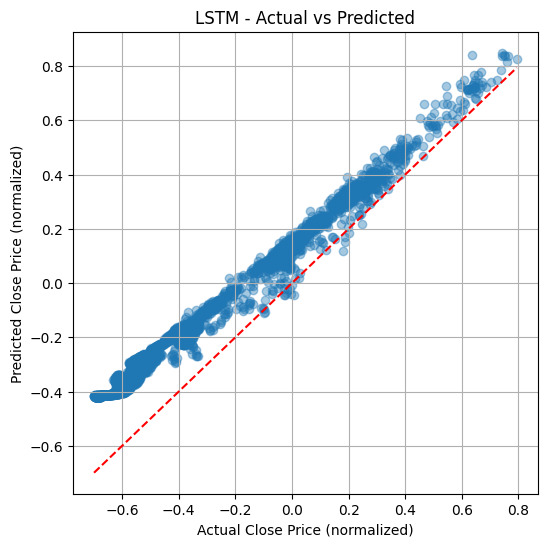

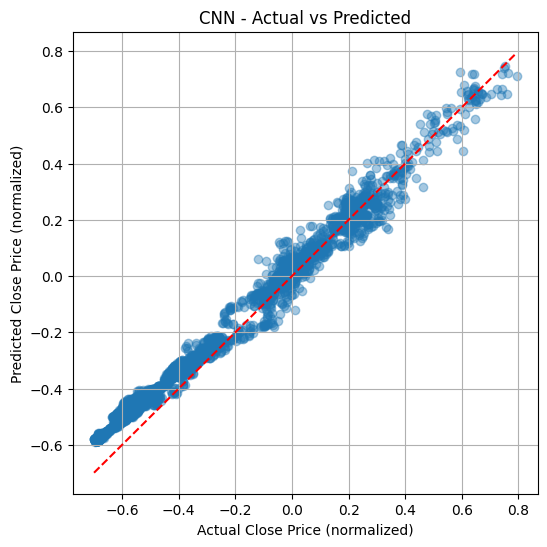

In [ ]:

def plot_scatter(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.4)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')  # perfect line
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Actual Close Price (normalized)')
    plt.ylabel('Predicted Close Price (normalized)')
    plt.grid(True)
    plt.show()

plot_scatter(y_test, y_pred_lstm, 'LSTM')
plot_scatter(y_test, y_pred_cnn, 'CNN')
